# ***DEMOGRAPHIC DATA PREPARATION***
1. reading .xpt file in pandas
2. renaming columns
3. dropping columns
4. recoding categorical variables

In [ ]:
import pandas as pd
demo = pd.read_sas('P_DEMO.XPT')
demog = demo.rename(columns={'SEQN' : 'Sequence no.', 'RIDSTATR': 'Interview/Examination status' , 'RIAGENDR' : 'Gender', 'RIDAGEYR': 'Age', 'RIDAGEMN' :'Age in months', 'RIDRETH3' : 'Race/Hispanic origin w/ NH Asian', 'RIDEXMON': 'Six-month period when exam was performed', 'DMDBORN4' :'Country of birth', 'DMDYRUSZ': 'Length of time in US', 'DMDEDUC2': 'Education level Adults 20+', 'DMDMARTZ': 'Marital status', 'RIDEXPRG': 'Pregnancy status at exam', 'WTINTPRP': 'Full sample interview weight', 'WTMECPRP': 'Full sample MEC exam weight', 'SDMVPSU': 'Masked variance pseudo-PSU', 'SDMVSTRA': 'Masked variance pseudo-stratum', 'INDFMPIR': 'Ratio of family income to poverty'})
#drop variables here using drop() method
demogr = demog.drop(demog.iloc[:,[1,2,5,6,8,14,15,16,17,18,19,20,21,22,23]], axis=1)
#Recode variables here using replace() method
demogra= demogr.replace(to_replace= {'Gender':{1:'Male', 2:'Female'},'Race/Hispanic origin w/ NH Asian' : {1:'Mexican American' , 2:'Other Hispanic' , 3:'Non-Hispanic White' , 4:'Non-Hispanic Black' , 6:'Non-Hispanic Asian' , 7:'Other Race - Including Multi-Racial'}, 'Country of birth' : {1:'Born in 50 US states or Washington, DC' , 2:'Others', 77:'Refused', 99:'Dont Know'}, 'Length of time in US' : {1:'Less than 5 years' , 2:'5 or more but less than 15 years', 3:'15 or more but less than 30 years' , 4:'30 years or more' , 77:'Refused' , 99:'Dont Know'}, 'Education level Adults 20+' : {1:'Less than 9th grade' , 2:'9-11th grade (Includes 12th grade with no diploma)' , 3:'High school graduate/GED or equivalent', 4:'Some college or AA degree', 5:'College graduate or above' ,7:'Refused' , 9:'Dont Know'}, 'Marital status' : {1:'Married/Living with Partner' , 2:'Widowed/Divorced/Separated' ,3:'Never married' , 77:'Refused' ,99:'Dont Know'}, 'Pregnancy status at exam' : {1:'Yes, positive lab pregnancy test or self-reported pregnant at exam' , 2:'The participant was not pregnant at exam' ,3:'Cannot ascertain if the participant is pregnant at exam'} })


In [ ]:
demog[(demog['Age'] >= 18) & (demog['SIAPROXY']== 2)].shape
# Mental health data has been collected for 18+ individuals and no proxies were used.
# i.e. there must be 9543 individuals who were interviewed on mental health
#But as is clear from shape of mental health dataset that only 8965 individuals were recorded. This is owing to
#the line in NHANES guidelines that the data is edited for completeness and consistency.

demogr.isnull().sum()
# Education level and Marital status was only asked to respondents aged 20+.
#demogr[demogr['Age']< 20].shape # Shows that the missing values in these columns are by virtue of non-eligibility for these questions. Hence these need not be imputed.


Sequence no.                             0
Gender                                   0
Age                                      0
Race/Hispanic origin w/ NH Asian         0
Country of birth                         0
Length of time in US                 12532
Education level Adults 20+            6328
Marital status                        6328
Pregnancy status at exam             13686
Full sample interview weight             0
Full sample MEC exam weight              0
Masked variance pseudo-PSU               0
Masked variance pseudo-stratum           0
Ratio of family income to poverty     2201
dtype: int64

# ***MENTAL HEALTH DATA PREPARATION***
1. reading the .xpt file in pandas
2. rounding off
3. renaming columns
4. dropping columns
5. recoding categorical variables

In [ ]:
mental = pd.read_sas('P_DPQ.XPT')
mental = mental.round(3)
mental_renamed= mental.rename(columns = {'SEQN': 'Sequence no.', 'DPQ020': 'Feeling down, depressed, or hopeless', 'DPQ060': 'Feeling bad about yourself', 'DPQ090': 'Thoughts you would be better off dead', 'DPQ100':'Difficulty these problems have caused'})
mental_renamed1= mental_renamed.drop(mental_renamed.iloc[:,[1,3,4,5,6,7,8,9,10]], axis=1)
freq_depressive_thoughts = mental_renamed1.replace({'Feeling down, depressed, or hopeless' : {0:'Not at all' , 1:'Several days' ,2:'More than half the days' , 3:'Nearly every day' ,7:'Refused' , 9:'Dont know'}})
freq_depressive_thoughts.isnull().sum()

Sequence no.                              0
Feeling down, depressed, or hopeless    659
dtype: int64

# ***MERGING - THE FINAL DATASET***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
df_final = freq_depressive_thoughts.merge(demogra, how='inner', on ='Sequence no.')
df_final.replace(to_replace='.' , value=np.nan, inplace=True)
df_final.info()
df_final.isnull().mean()*100

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8965 entries, 0 to 8964
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Sequence no.                          8965 non-null   float64
 1   Feeling down, depressed, or hopeless  8306 non-null   object 
 2   Gender                                8965 non-null   object 
 3   Age                                   8965 non-null   float64
 4   Race/Hispanic origin w/ NH Asian      8965 non-null   object 
 5   Country of birth                      8965 non-null   object 
 6   Length of time in US                  2552 non-null   object 
 7   Education level Adults 20+            8544 non-null   object 
 8   Marital status                        8544 non-null   object 
 9   Pregnancy status at exam              1750 non-null   object 
 10  Full sample interview weight          8965 non-null   float64
 11  Full sample MEC e

Sequence no.                             0.000000
Feeling down, depressed, or hopeless     7.350809
Gender                                   0.000000
Age                                      0.000000
Race/Hispanic origin w/ NH Asian         0.000000
Country of birth                         0.000000
Length of time in US                    71.533742
Education level Adults 20+               4.696040
Marital status                           4.696040
Pregnancy status at exam                80.479643
Full sample interview weight             0.000000
Full sample MEC exam weight              0.000000
Masked variance pseudo-PSU               0.000000
Masked variance pseudo-stratum           0.000000
Ratio of family income to poverty       14.054657
dtype: float64

***VARIABLES DESCRIPTION***

0. Sequence no. - Nominal - to uniquely identify respondent
1. Feeling down, depressed, or hopeless - Ordinal - Target variable - 9 categories - missing values - was asked at MEC

2. Gender - nominal-2 categor                               
3. Age - quantitative                                   
4. Race/Hispanic origin w/ NH Asian - nominal- 6 categories
5. Country of birth- nominal- 4 categor                      
6. Length of time in US - interval freq- a lot missing                   
7. Education level Adults 20+ - ordinal -7 categ-missing
was asked to people aged 20+ due to disclosure risks,so missing data must not be imputed.
8. Marital status -nominal-5 categ - missing - was asked to people aged 20+ due to disclosure risks , so data must not be imputed                        
9. Pregnancy status at exam-nominal-3 categ-missing
was asked to people aged 20-44  
10.  Full sample interview weight          
11.  Full sample MEC exam weight
12.  Masked variance pseudo-PSU
13.  Masked variance pseudo-stratum
14.  Ratio of family income to poverty -
The family income of the individual is determined (if the person doesn't live with the family, lives alone or with unrelated people, then they are considered single family) and then this is divided by poverty threshold set up by the government. If ratio is 2 then it means that that individual's family is earning twice as much as is required to stay out of poverty. Since there is no way to ensure respondents family size, this factor may not tell us how income of an individual contributes to their mental health status.  At best it can tell us what does a ratio below 1 and a very high ratio mean for mental health status.

In [ ]:
# IMPUTATION

df_final.isnull().sum()
df_final.isnull().mean()*100

# 1. As we have already shown,the missing values in Education and Marital status is not by virtue of non response or data mishandling, it is due to eligibility issues.
df_final[df_final['Age']<20].shape
#Number of missing values in Education and Marital status = number of individuals aged less than 20.
#i.e every individual aged 20 or more has answered this question.
df_final['Marital status'].fillna(value='Not eligible', inplace=True)
df_final['Education level Adults 20+'].fillna(value='Not eligible', inplace=True)


# 2. Feeling down, depressed and Ratio of family income clearly need to be imputed as they have 7 and 14% missing values.

# 3. pregnancy status - out of 8965 , 5691 people were ineligible for this question. out of those 1750 eligible, 1524 are missing.
#Over 63% people were not asked this question because they were ineligible. Doesn't make much sense to keep it
(df_final[df_final['Age']<20].shape , df_final[df_final['Age']>44].shape)

#4. Length of time in US - It's main function would have been to identify immigrants along with age but that is already taken care of by country of birth

#Reasons to keep it ?
#Length of time spent in US coupled with Race - How is the mental health of asians/mexicans who have just arrived in US?
#Length of time spent in US coupled with marital status - How often do couples who have recently moved to US experience depressive thoughts?

(df_final[df_final['Country of birth']=='Others'].shape, df_final[df_final['Country of birth']=='Born in 50 US states or Washington, DC'].shape)
#There is also good enough representation of immigrants and US born folks

#5. Ratio of family income to poverty - I thought of an imputation technique. Since this is a top coded variable, it's mean is not reliable.
#imputing null values with mean may not be the best idea. I checked that about 15% of the data in this variable is = 5 (where it is topcoded)
# There are 1260 values to be imputed. How about we impute 15% of 1260 by 5 and the rest by mean ?
# This will help to preserve the distribution



((2552, 15), (6408, 15))

(1387, 15)

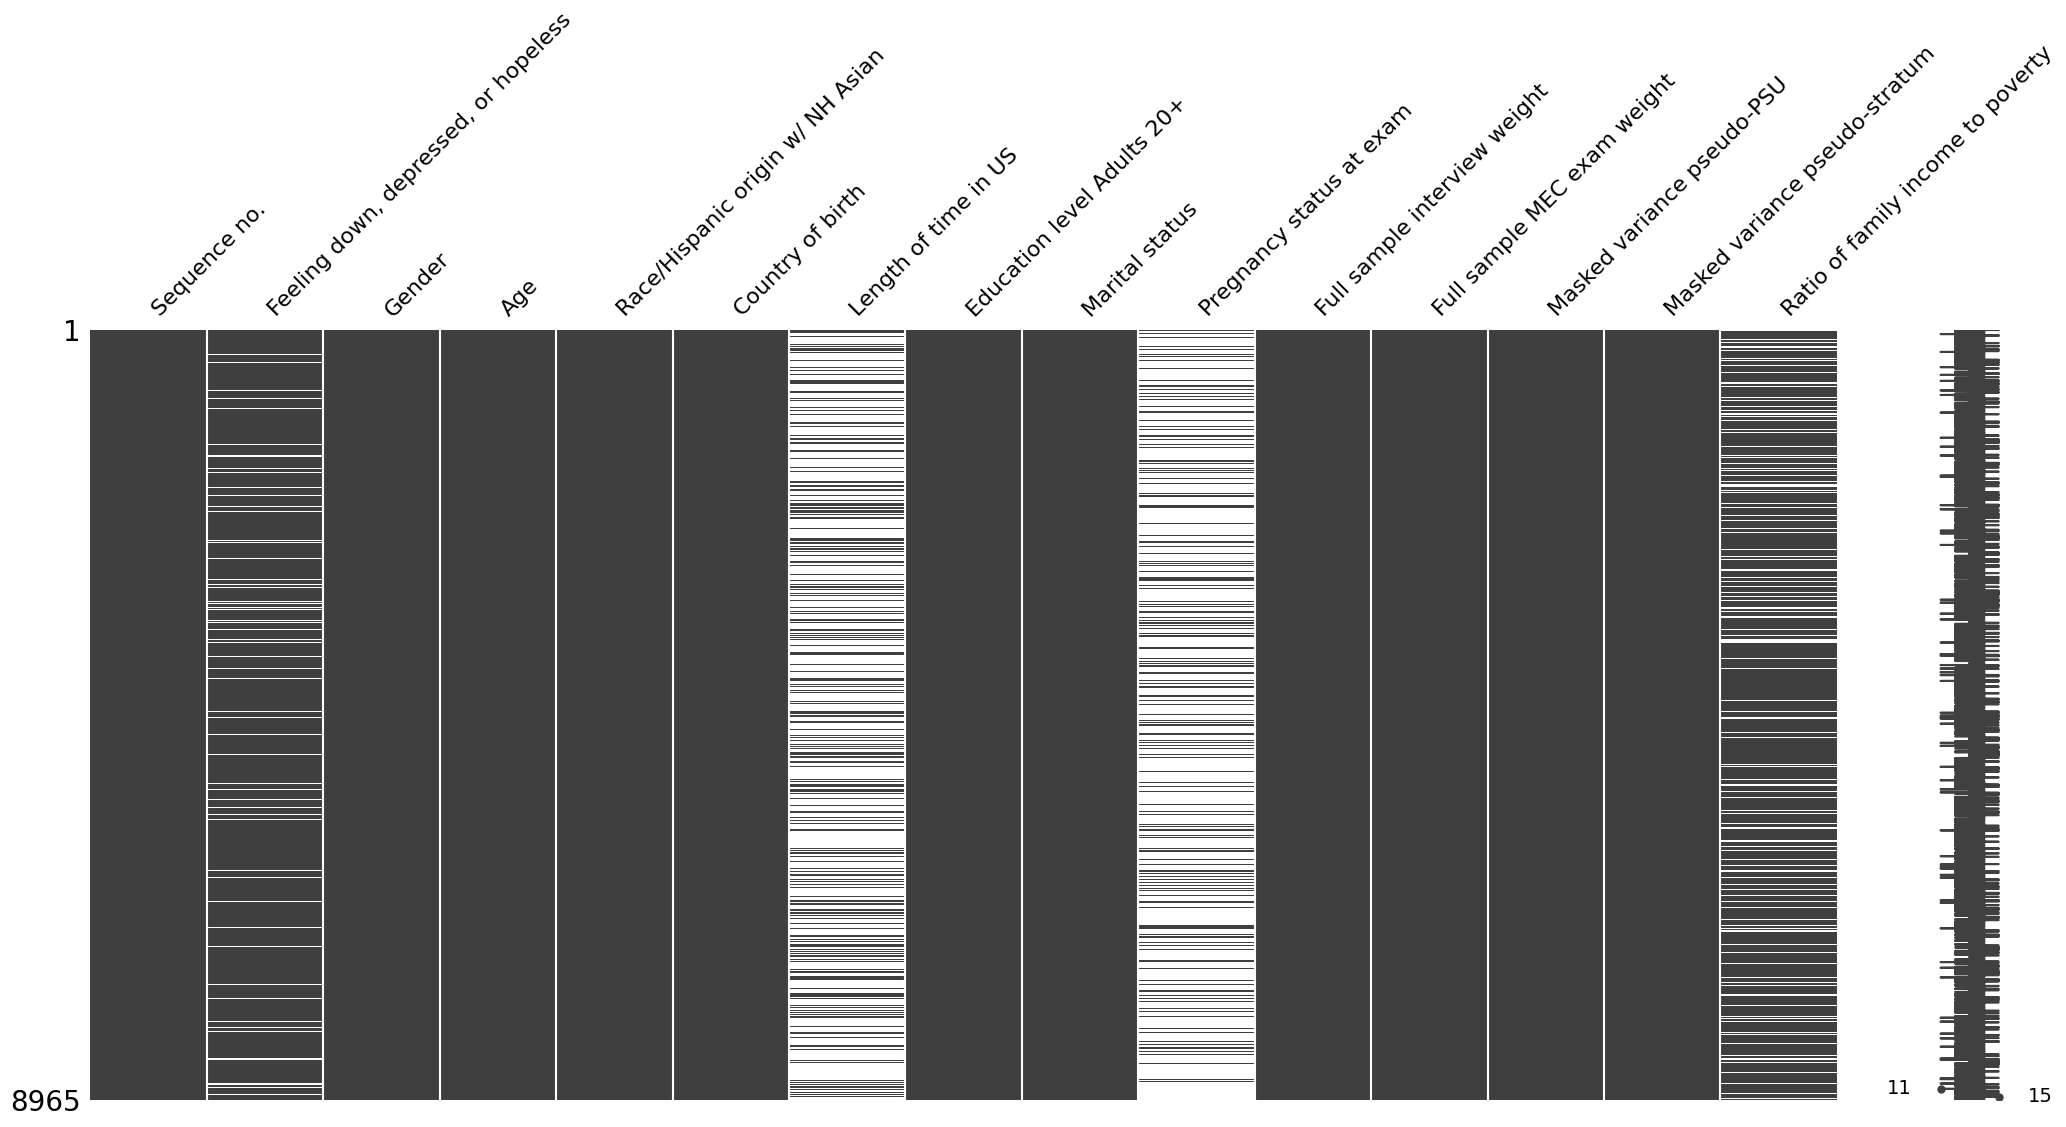

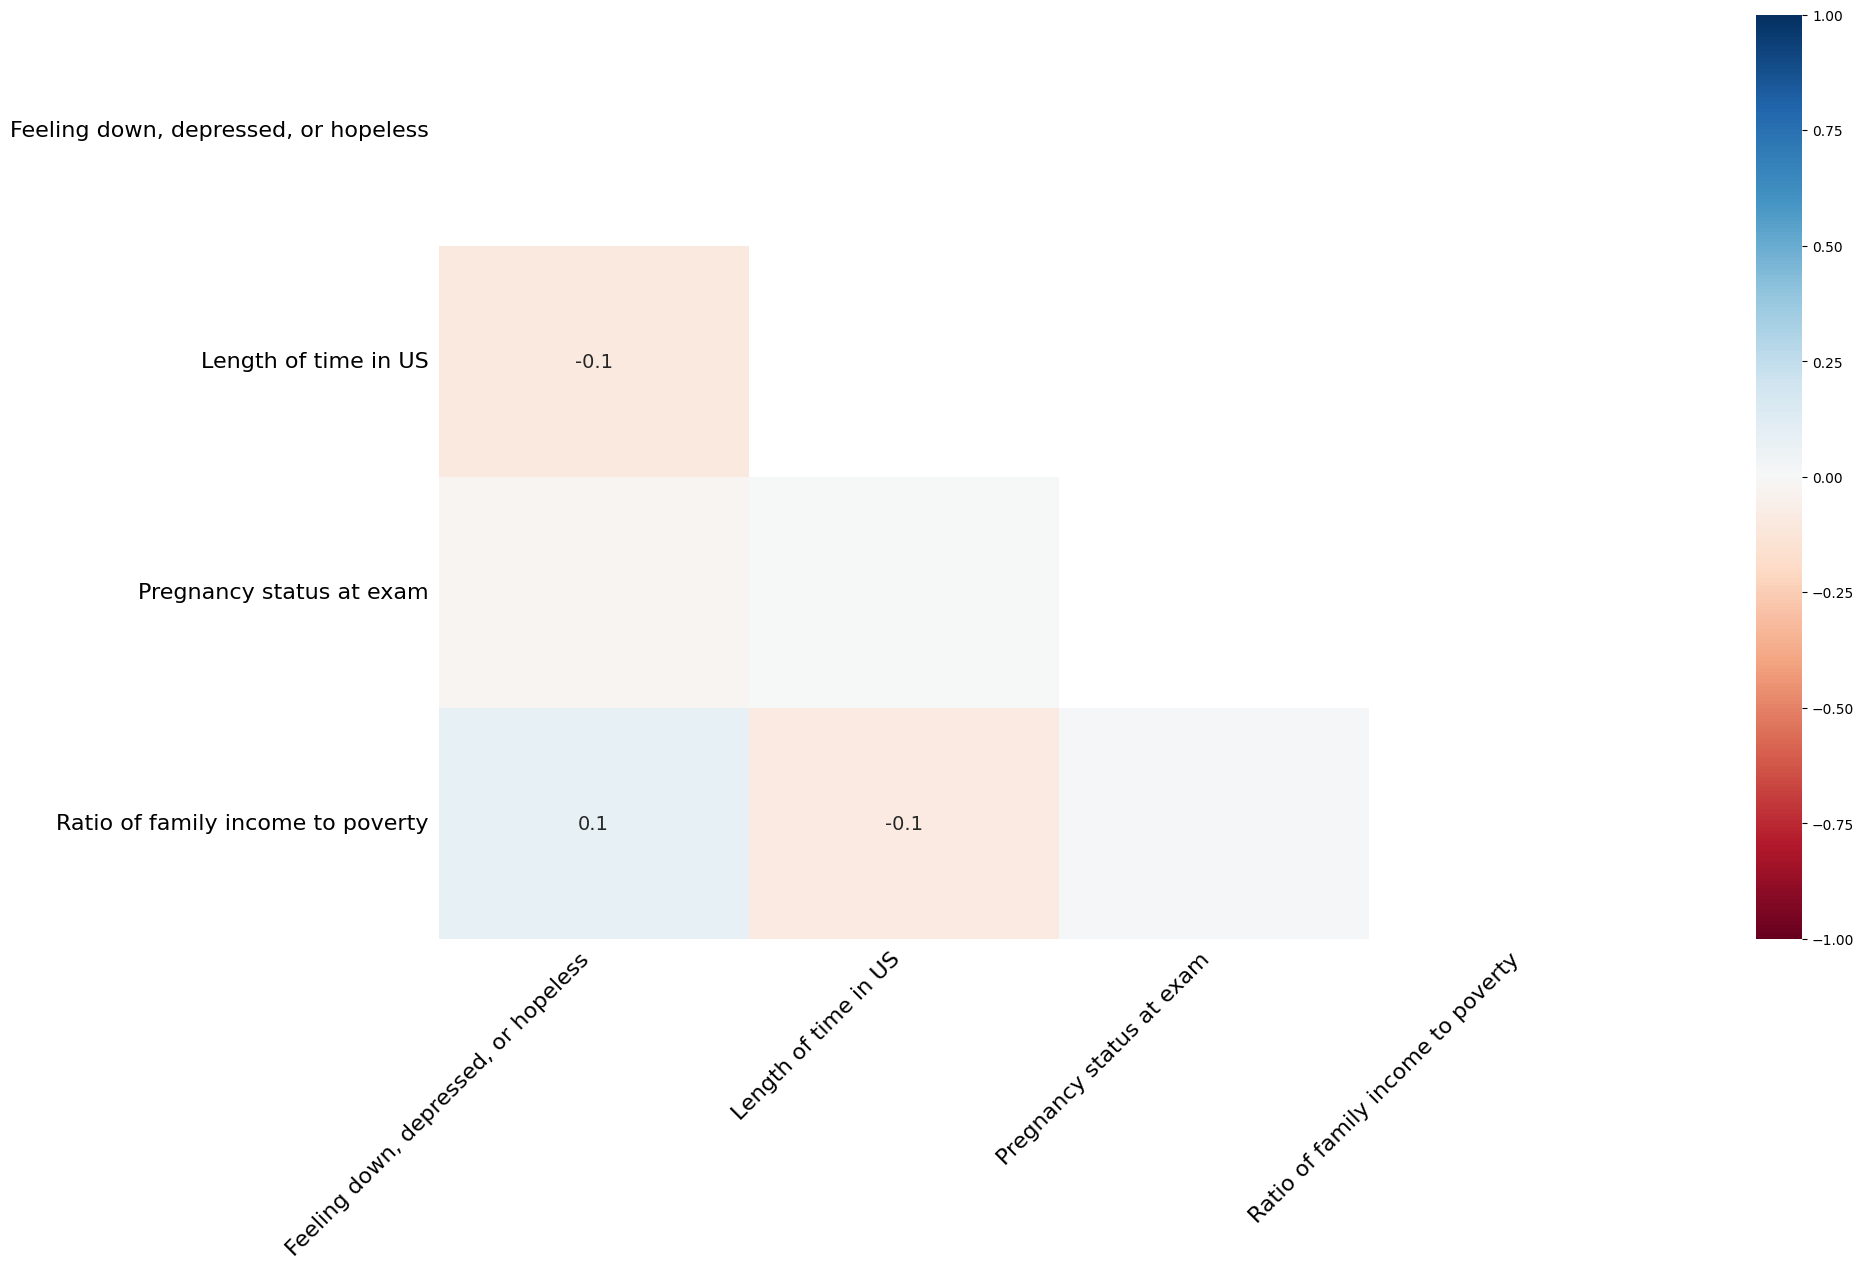

In [ ]:
msno.matrix(df_final) #By direct observation, missing values in ratio and mental health status columns seem to be MCAR.
msno.heatmap(df_final)
df_final[df_final['Ratio of family income to poverty']==5].shape

2.5587397793640494

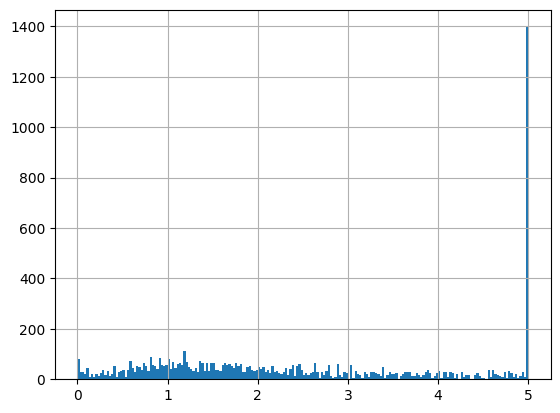

In [ ]:
df_final['Ratio of family income to poverty'].hist(bins=200)
df_final[df_final['Ratio of family income to poverty'].round(3)>4.8].shape
df_final['Ratio of family income to poverty'].mean()

False    8544
True      421
Name: Marital status, dtype: int64